# CSE 6367 
# Programming Assignment 3 (P3)

## Eigenfaces (100 points)

### Task1 (30 points)
1. Load all the 25 images in the "/Eigenfaces/Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

In [1]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread_collection, imshow

1. Load all the 25 imges in "/Eignfaces/Train"
2. Display all the original faces in 5X5 grid. Resize the images to 100X100 pixes for display only

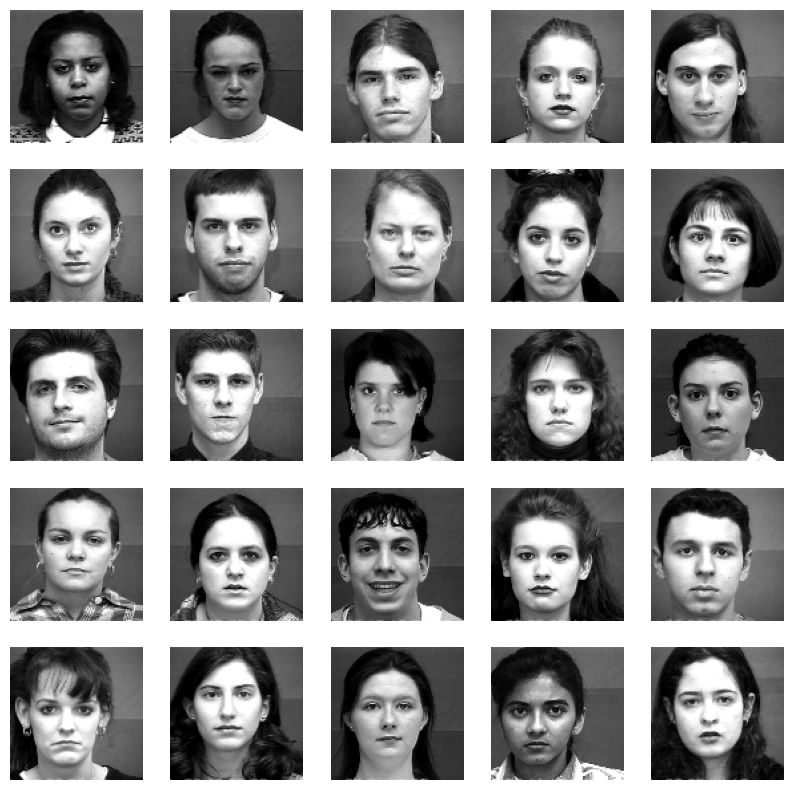

In [2]:
image_dir = "./Eigenfaces/Train"
image_files = imread_collection(os.path.join(image_dir, '*.jpg'))

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    resized_img = cv2.resize(image_files[i], (100, 100))
    plt.imshow(resized_img, cmap='gray')
    plt.axis('off')
plt.show()

3. Find the mean face image. Perform PCA on the training faces.

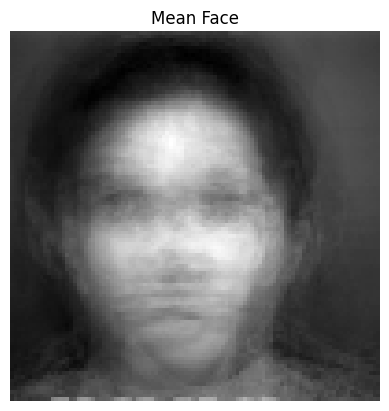

PCA(n_components=25)

In [3]:
grayscale_images = []

for img in image_files:
    if img.shape[-1] == 3:
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        grayscale_img = img
    resized_img = cv2.resize(grayscale_img, (100, 100))
    grayscale_images.append(resized_img)

mean_face = np.mean(grayscale_images, axis=0)
mean_face = cv2.resize(mean_face, (100,100))


plt.figure()
plt.title("Mean Face")
plt.imshow(mean_face, cmap='gray')
plt.axis('off')
plt.show()

images = np.array(grayscale_images)

flattened_images = images.reshape(images.shape[0], -1)

n_components = 25
pca = PCA(n_components = n_components)
pca.fit(flattened_images)

4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

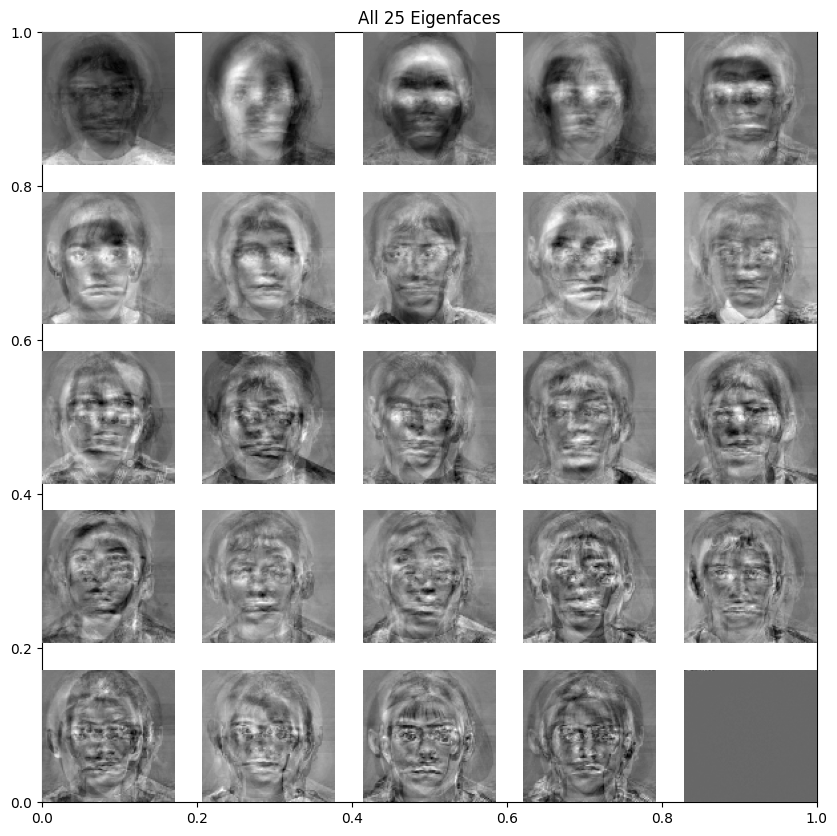

In [4]:
eigenfaces = pca.components_.reshape((-1, 100, 100))

plt.figure(figsize=(10, 10))
plt.title("All 25 Eigenfaces")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
plt.show()

### Task2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

K = 2

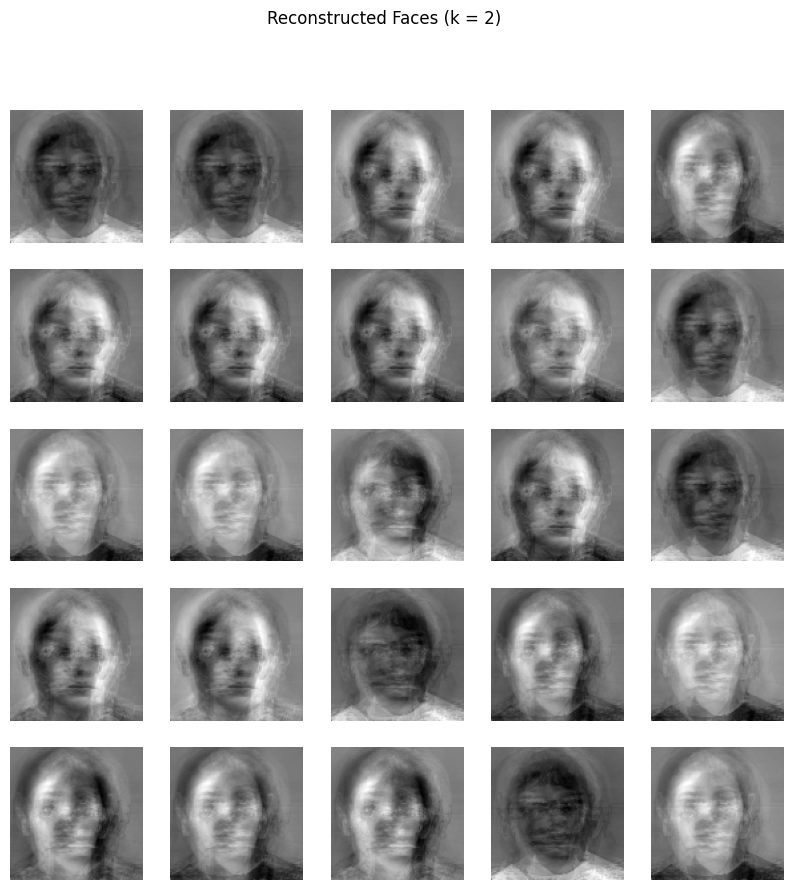

In [5]:
k = 2
selected_eigenfaces = eigenfaces[:k]

reconstructed_faces = np.dot(pca.transform(flattened_images)[:, :k], selected_eigenfaces.reshape(k, -1))
reconstructed_faces = reconstructed_faces.reshape(-1, 100, 100)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.axis('off')
plt.suptitle(f'Reconstructed Faces (k = {k})')
plt.show()

K = 5

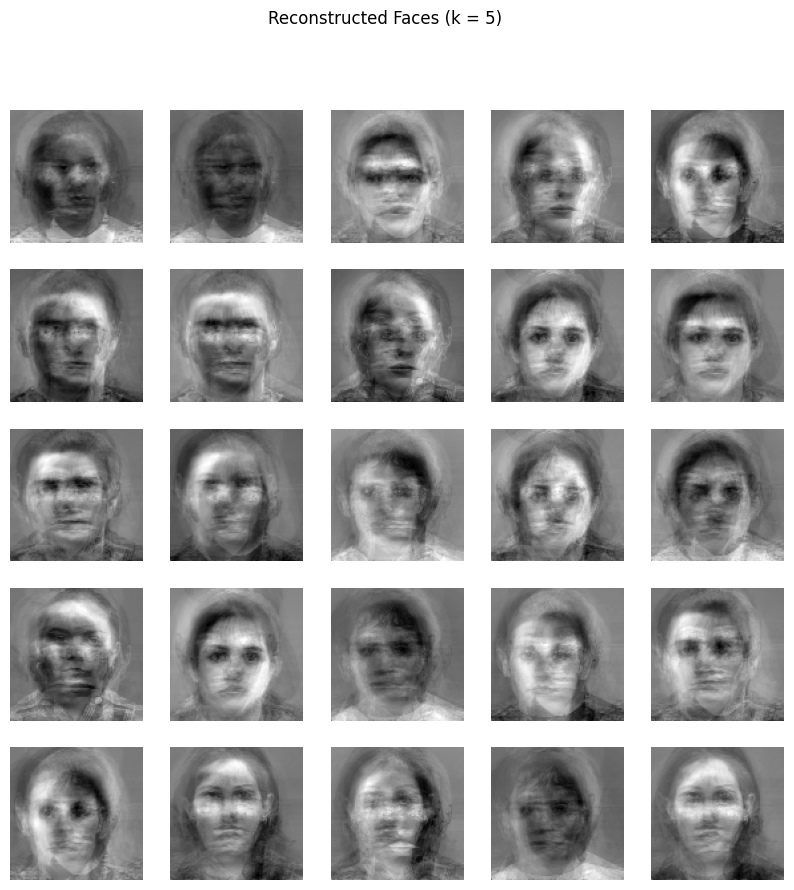

In [6]:
k = 5
selected_eigenfaces = eigenfaces[:k]

reconstructed_faces = np.dot(pca.transform(flattened_images)[:, :k], selected_eigenfaces.reshape(k, -1))
reconstructed_faces = reconstructed_faces.reshape(-1, 100, 100)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.axis('off')
plt.suptitle(f'Reconstructed Faces (k = {k})')
plt.show()

K = 15

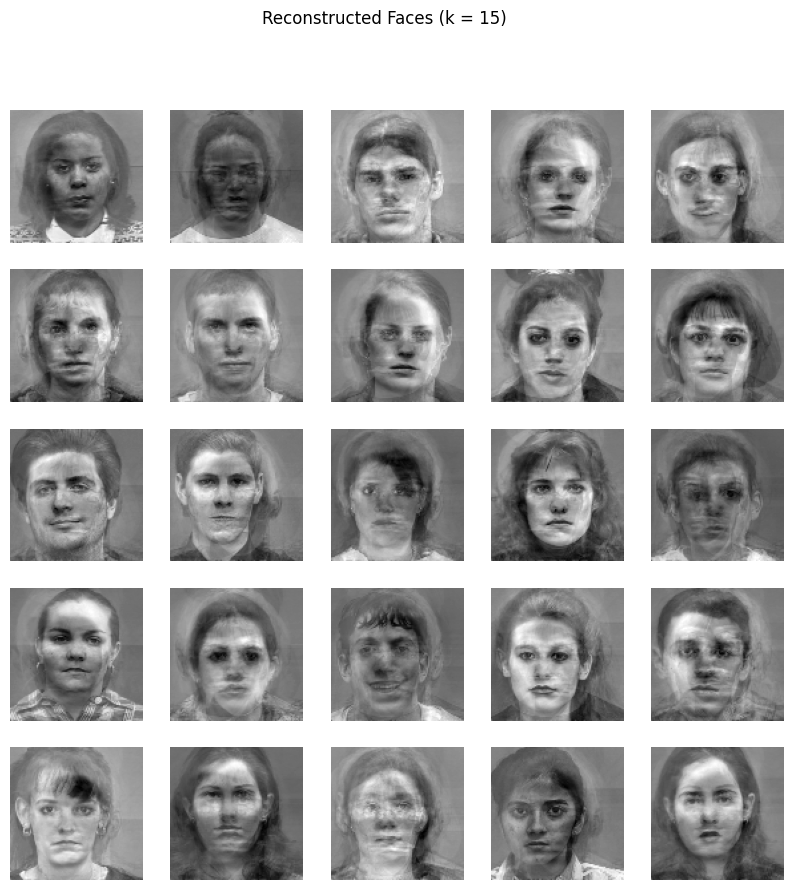

In [7]:
k = 15
selected_eigenfaces = eigenfaces[:k]

reconstructed_faces = np.dot(pca.transform(flattened_images)[:, :k], selected_eigenfaces.reshape(k, -1))
reconstructed_faces = reconstructed_faces.reshape(-1, 100, 100)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.axis('off')
plt.suptitle(f'Reconstructed Faces (k = {k})')
plt.show()

### Task3 (40 points)
1. Load all the test images from "/Eigenfaces/Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.

K = 2

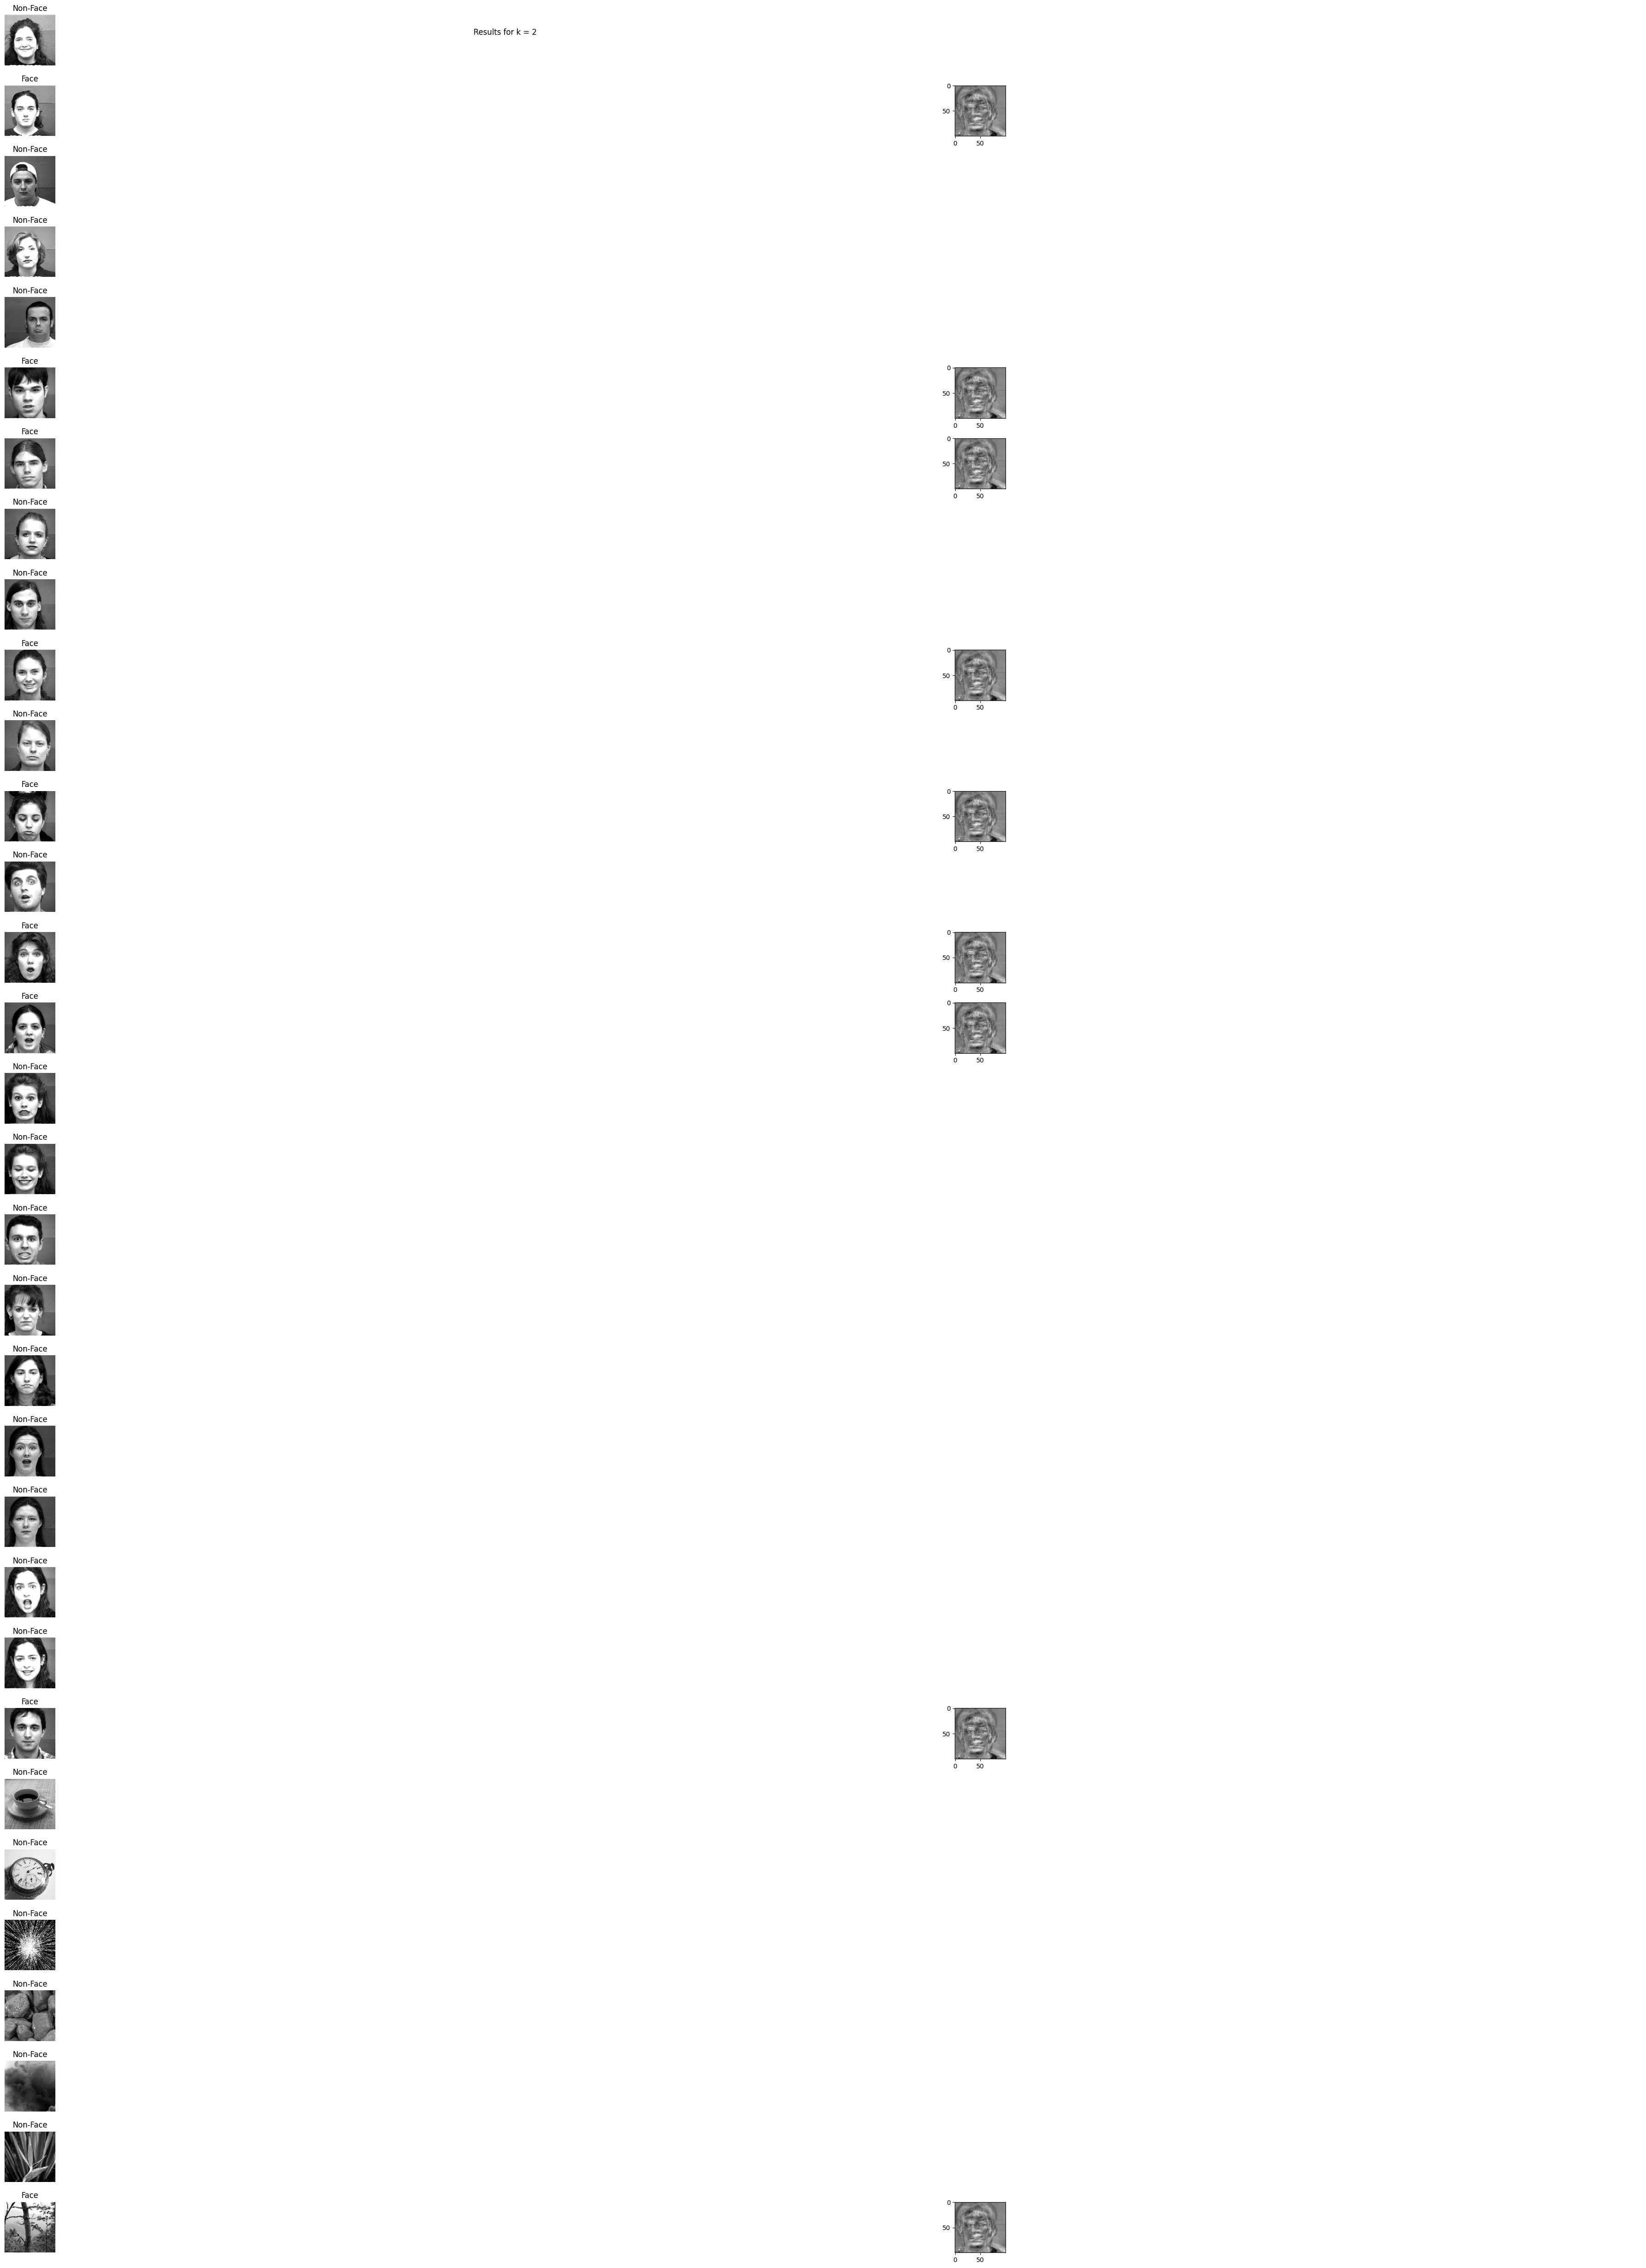

In [8]:
k = 2

test_image_dir = "./Eigenfaces/Test"
test_image_files = imread_collection(os.path.join(test_image_dir, '*.jpg'))

eigenfaces = pca.components_.reshape((-1, 100, 100))

results = []

for test_image in test_image_files:
    if test_image.shape[-1] == 3:
        test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    test_image = cv2.resize(test_image, (100, 100))
    test_image_flat = test_image.flatten()

    test_projection = np.dot(test_image_flat, eigenfaces[:k].reshape(k, -1).T)

    reconstructed_image = np.dot(test_projection, eigenfaces[:k].reshape(k, -1)).reshape(100, 100)

    distances = np.linalg.norm(flattened_images - reconstructed_image.flatten(), axis=1)
    closest_index = np.argmin(distances)

    is_face = True

    tolerance = 8500

    if distances[closest_index] > tolerance:
        is_face = False

    results.append((test_image, is_face, eigenfaces[closest_index]))

M = len(test_image_files)
fig, ax = plt.subplots(M, 2, figsize=(50, 50))

for i in range(M):
    test_img, is_face, closest_eigenface = results[i]

    ax[i, 0].imshow(test_img, cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title("Face" if is_face else "Non-Face")

    if is_face:
        ax[i, 1].imshow(closest_eigenface, cmap='gray')
    else:
        ax[i, 1].axis('off')
        ax[i, 1].set_title("")

plt.suptitle(f"Results for k = {k}")
plt.tight_layout()
plt.show()

K = 5

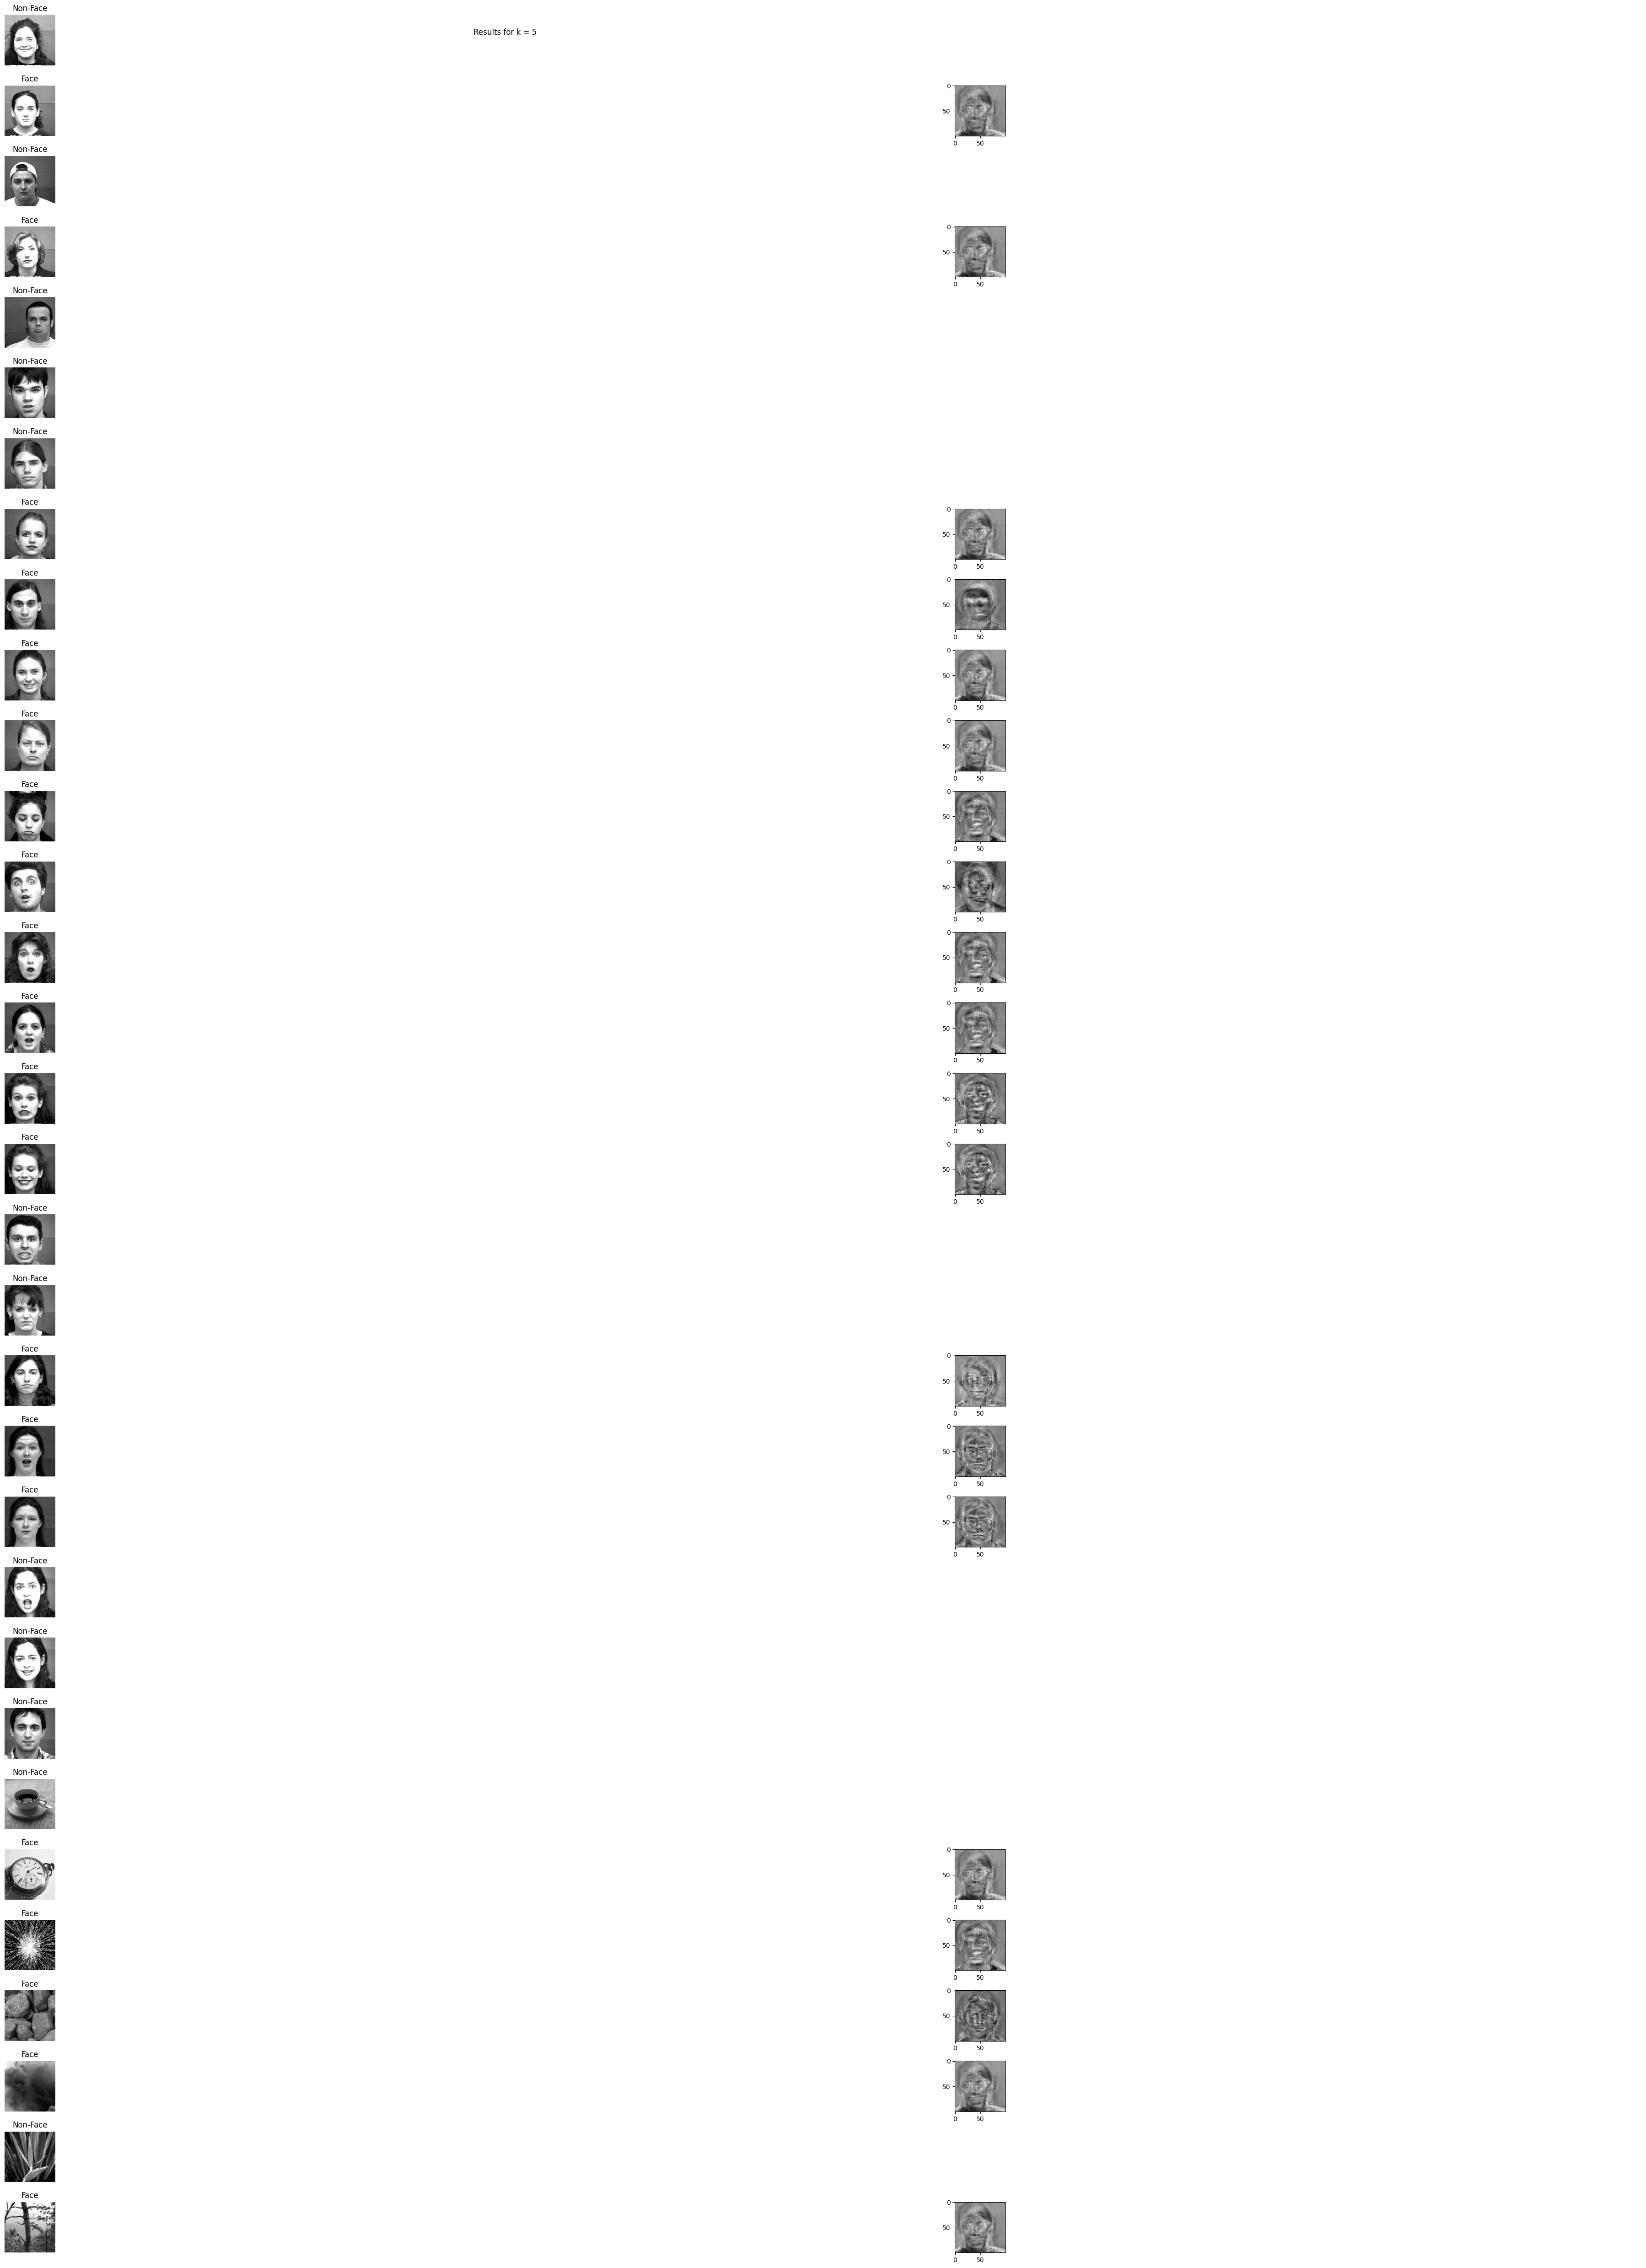

In [9]:
k = 5

test_image_dir = "./Eigenfaces/Test"
test_image_files = imread_collection(os.path.join(test_image_dir, '*.jpg'))

eigenfaces = pca.components_.reshape((-1, 100, 100))

results = []

for test_image in test_image_files:
    if test_image.shape[-1] == 3:
        test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    test_image = cv2.resize(test_image, (100, 100))
    test_image_flat = test_image.flatten()

    test_projection = np.dot(test_image_flat, eigenfaces[:k].reshape(k, -1).T)

    reconstructed_image = np.dot(test_projection, eigenfaces[:k].reshape(k, -1)).reshape(100, 100)

    distances = np.linalg.norm(flattened_images - reconstructed_image.flatten(), axis=1)
    closest_index = np.argmin(distances)

    is_face = True

    tolerance = 8500

    if distances[closest_index] > tolerance:
        is_face = False

    results.append((test_image, is_face, eigenfaces[closest_index]))

M = len(test_image_files)
fig, ax = plt.subplots(M, 2, figsize=(50, 50))

for i in range(M):
    test_img, is_face, closest_eigenface = results[i]

    ax[i, 0].imshow(test_img, cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title("Face" if is_face else "Non-Face")

    if is_face:
        ax[i, 1].imshow(closest_eigenface, cmap='gray')
    else:
        ax[i, 1].axis('off')
        ax[i, 1].set_title("")

plt.suptitle(f"Results for k = {k}")
plt.tight_layout()
plt.show()

K = 15

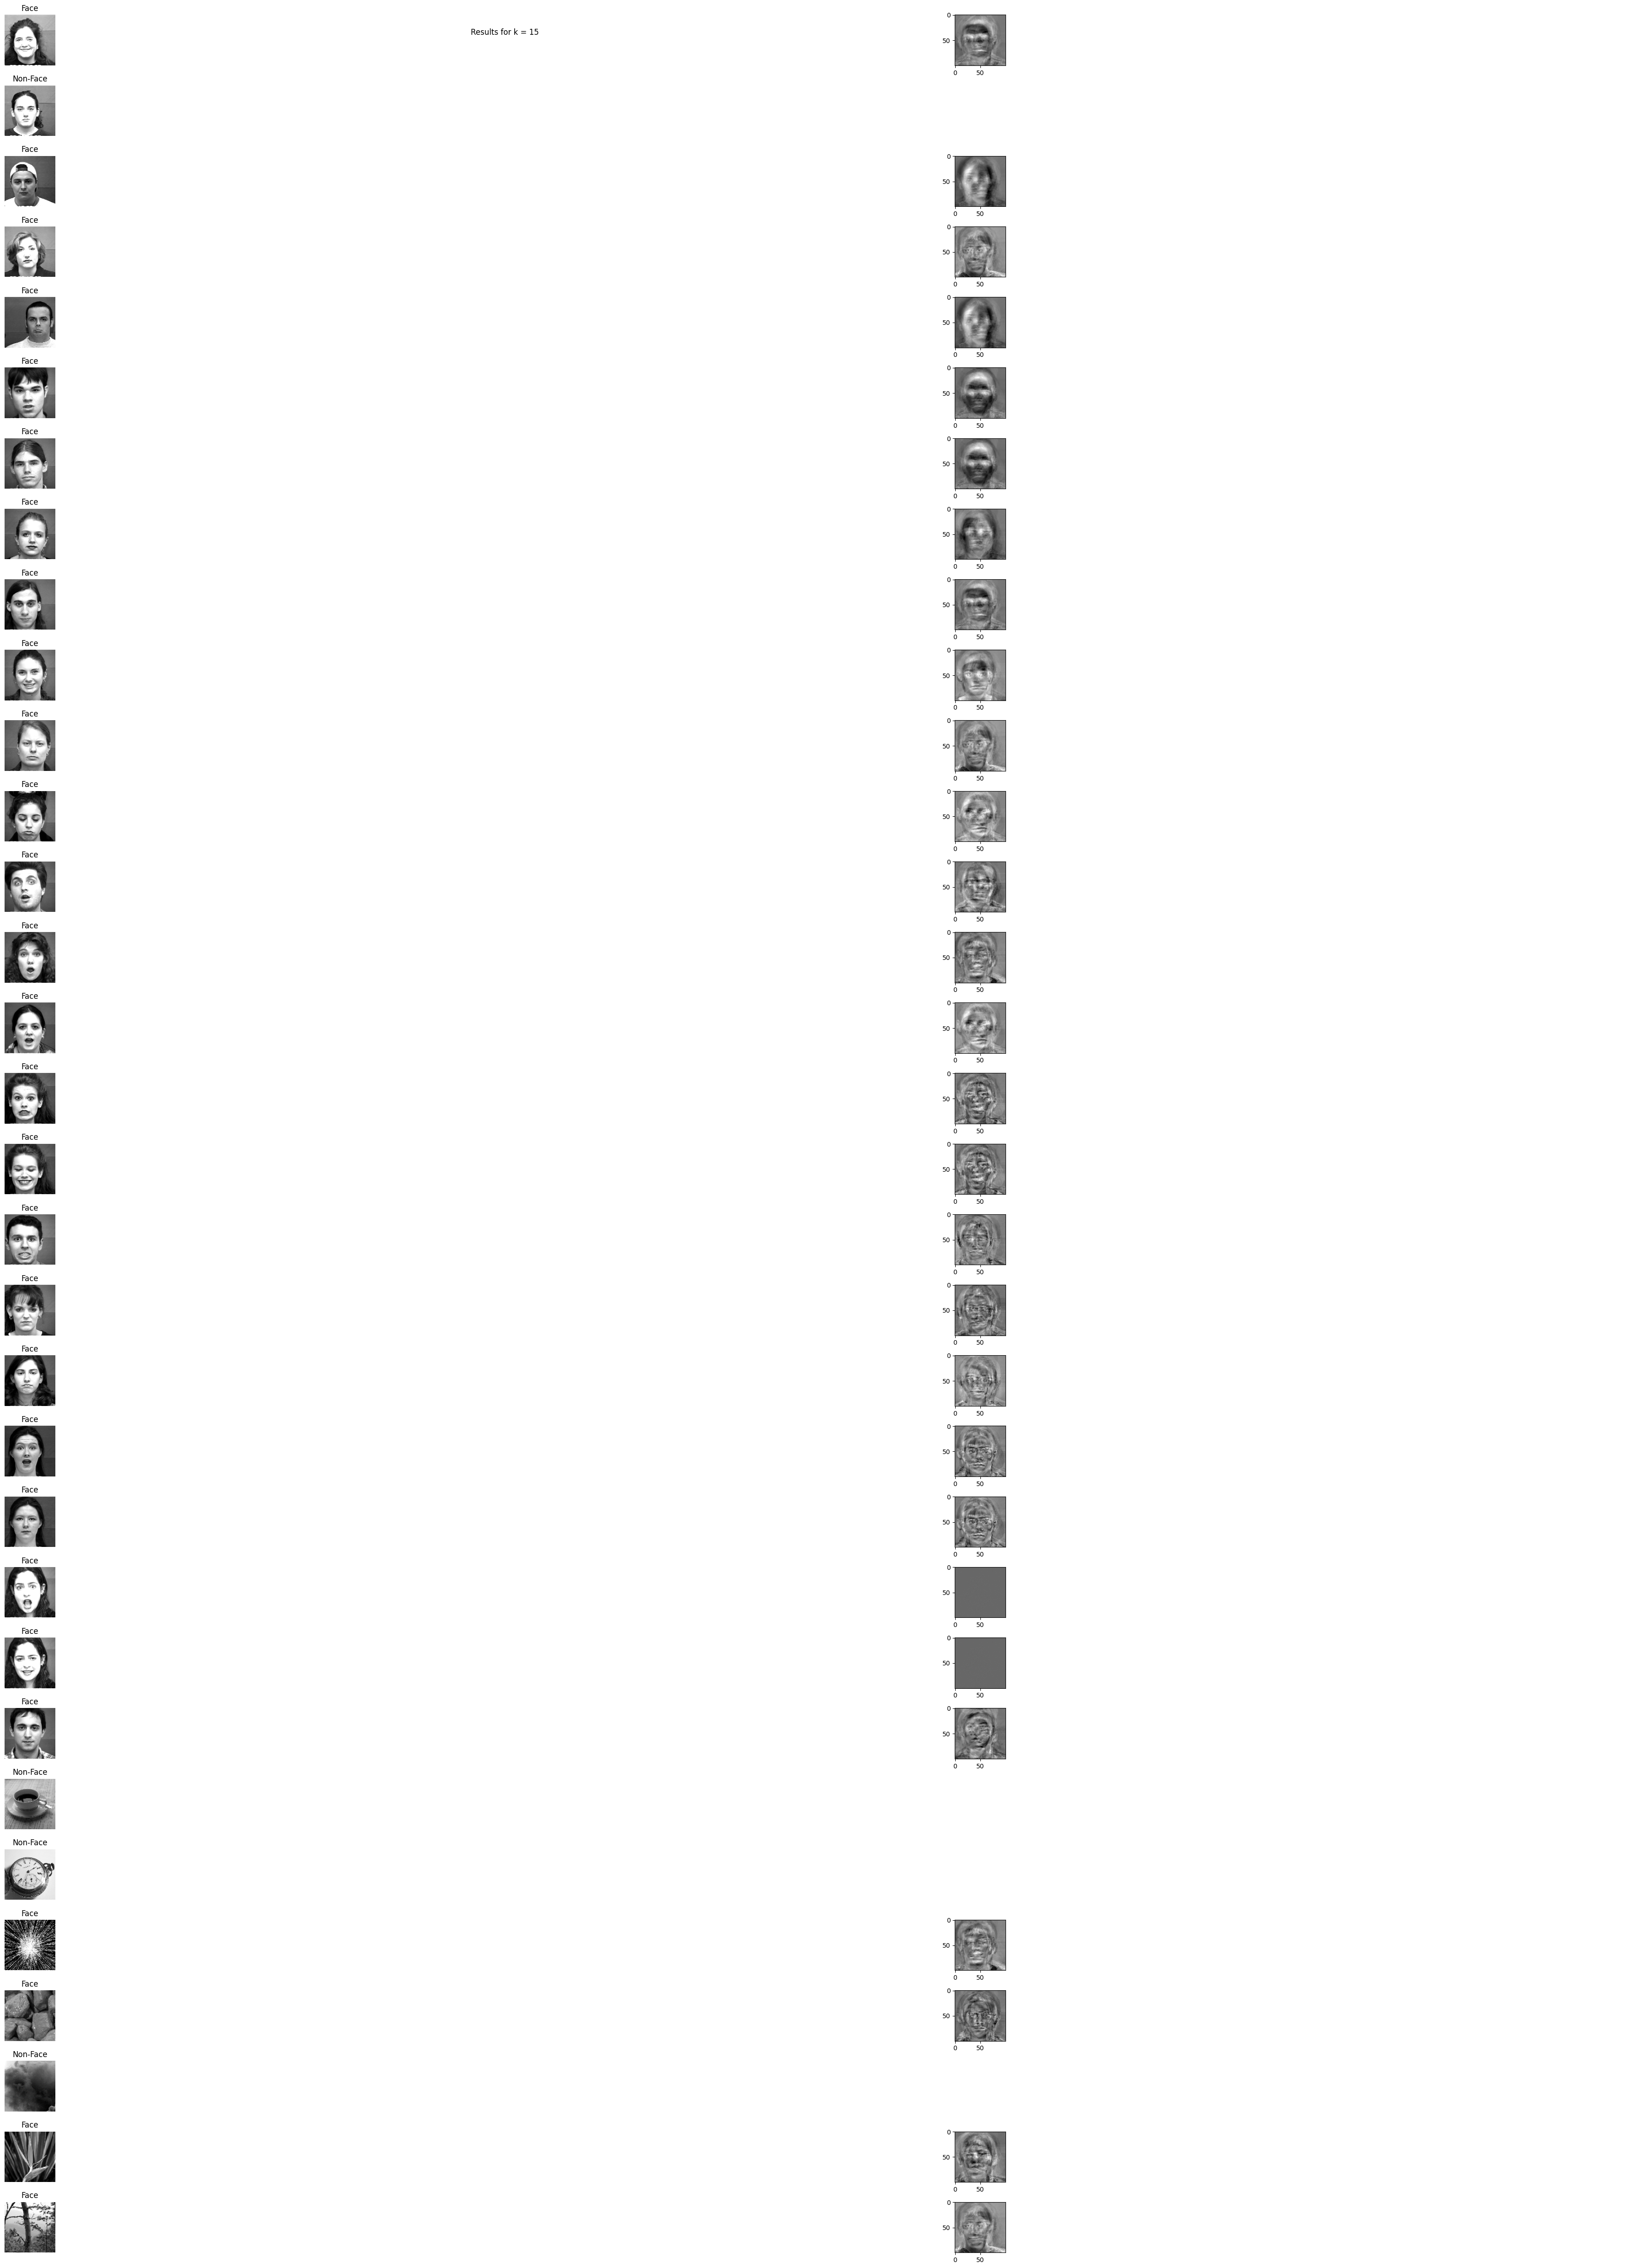

In [10]:
k = 15

test_image_dir = "./Eigenfaces/Test"
test_image_files = imread_collection(os.path.join(test_image_dir, '*.jpg'))

eigenfaces = pca.components_.reshape((-1, 100, 100))

results = []

for test_image in test_image_files:
    if test_image.shape[-1] == 3:
        test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    test_image = cv2.resize(test_image, (100, 100))
    test_image_flat = test_image.flatten()

    test_projection = np.dot(test_image_flat, eigenfaces[:k].reshape(k, -1).T)

    reconstructed_image = np.dot(test_projection, eigenfaces[:k].reshape(k, -1)).reshape(100, 100)

    distances = np.linalg.norm(flattened_images - reconstructed_image.flatten(), axis=1)
    closest_index = np.argmin(distances)

    is_face = True

    tolerance = 8500

    if distances[closest_index] > tolerance:
        is_face = False

    results.append((test_image, is_face, eigenfaces[closest_index]))

M = len(test_image_files)
fig, ax = plt.subplots(M, 2, figsize=(50, 50))

for i in range(M):
    test_img, is_face, closest_eigenface = results[i]

    ax[i, 0].imshow(test_img, cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title("Face" if is_face else "Non-Face")

    if is_face:
        ax[i, 1].imshow(closest_eigenface, cmap='gray')
    else:
        ax[i, 1].axis('off')
        ax[i, 1].set_title("")

plt.suptitle(f"Results for k = {k}")
plt.tight_layout()
plt.show()

### Submission Guidelines:
1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb
2. Import all the images from the ./Eigenfaces directory. Your TA will use the same directory name to grade your submission.
3. You don't need to attach the dataset with your submission.

Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA